# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | happy valley-goose bay
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | kavaratti
Processing Record 15 of Set 1 | puerto cabezas
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | mangaratiba
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | novyy urgal
Processing Record 20 of Set 1 | sumbawa besar
Processing Record 21 of Set 1 | pacasmayo
Processin

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,25.99,83,75,5.14,CC,1731518813
1,port-aux-francais,-49.3500,70.2167,3.74,90,100,12.13,TF,1731518815
2,jamestown,42.0970,-79.2353,8.90,41,0,2.68,US,1731518731
3,badger,64.8000,-147.5333,-17.88,78,75,1.54,US,1731518817
4,iskateley,67.6803,53.1512,-1.82,98,100,4.39,RU,1731518818


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,83,75,5.14,CC,1731518813
1,port-aux-francais,-49.3500,70.2167,3.74,90,100,12.13,TF,1731518815
2,jamestown,42.0970,-79.2353,8.90,41,0,2.68,US,1731518731
3,badger,64.8000,-147.5333,-17.88,78,75,1.54,US,1731518817
4,iskateley,67.6803,53.1512,-1.82,98,100,4.39,RU,1731518818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

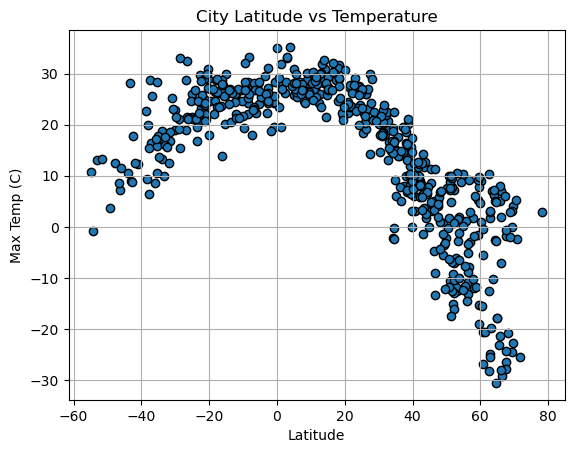

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.ylabel("Max Temp (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

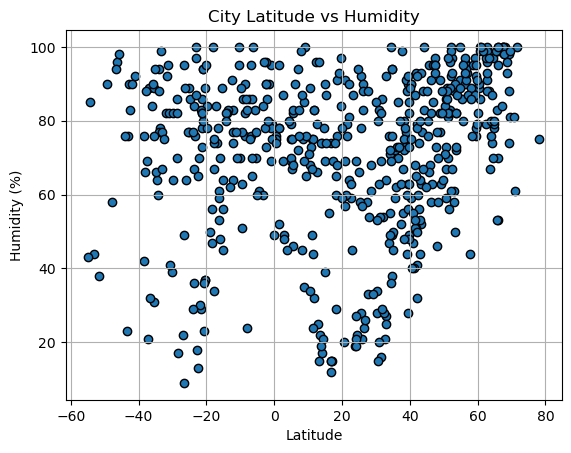

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', marker= 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

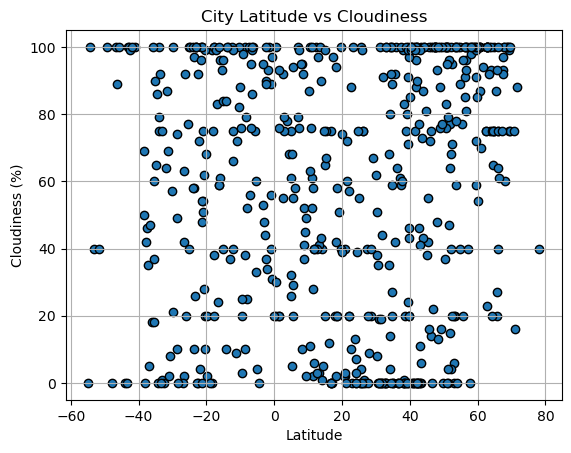

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

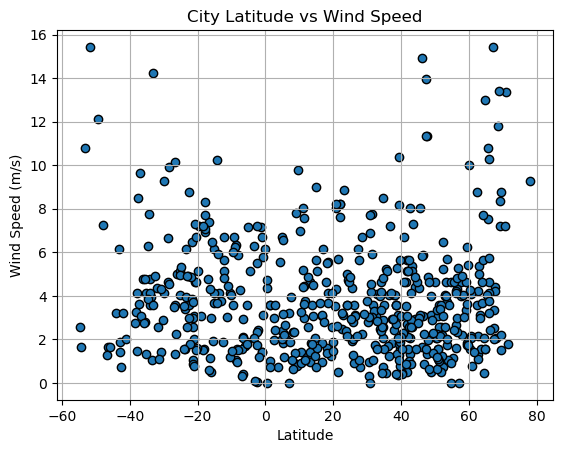

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', marker='o' )
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def lr_funcV2(x, y, name, vbl, hemi):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderror) = linregress(x, y)
    reg_values = x * slope + intercept
    
    # Plot regression line
    plt.plot(x, reg_values, color='r')
    
    # Plot settings
    plt.title(f'{hemi}: Latitude vs. {vbl}')
    plt.xlabel('Latitude')
    plt.ylabel(vbl)
    
    # Linear equation and r-value as strings
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    r_text = f'r-value = {round(rvalue, 2)}'
    
    # Display the equation and r-value outside the plot area
    plt.figtext(0.15, -0.1, line_eq, color="red", fontsize=12)
    plt.figtext(0.15, -0.15, r_text, color="blue", fontsize=12)
    
    # Adjust layout to make room for text
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"output_data/LinearRegression_{name}.png", bbox_inches='tight')
    plt.show()

In [3]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jamestown,42.0970,-79.2353,8.90,41,0,2.68,US,1731518731
3,badger,64.8000,-147.5333,-17.88,78,75,1.54,US,1731518817
4,iskateley,67.6803,53.1512,-1.82,98,100,4.39,RU,1731518818
6,isafjordur,66.0755,-23.1240,7.02,53,40,4.63,IS,1731518820
7,khandyga,62.6667,135.6000,-28.18,96,23,1.34,RU,1731518821


In [4]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,25.99,83,75,5.14,CC,1731518813
1,port-aux-francais,-49.3500,70.2167,3.74,90,100,12.13,TF,1731518815
5,adamstown,-25.0660,-130.1015,21.61,77,100,4.06,PN,1731518819
8,uturoa,-16.7333,-151.4333,26.23,74,83,7.38,PF,1731518823
10,punta arenas,-53.1500,-70.9167,13.06,44,40,10.80,CL,1731518825


###  Temperature vs. Latitude Linear Regression Plot

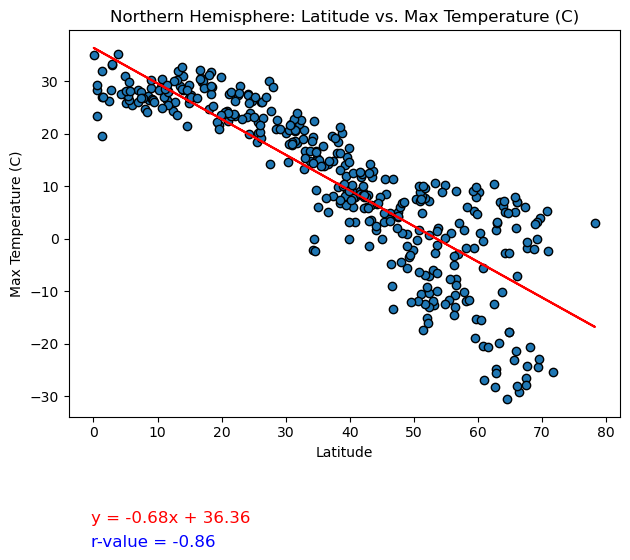

In [42]:
# Linear regression on Northern Hemisphere

plt.scatter(x_val, y_val, edgecolors='black')
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Max Temp']
name = 'Lat_NHvsMaxTemp'
vbl = 'Max Temperature (C)'
hemi = 'Northern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

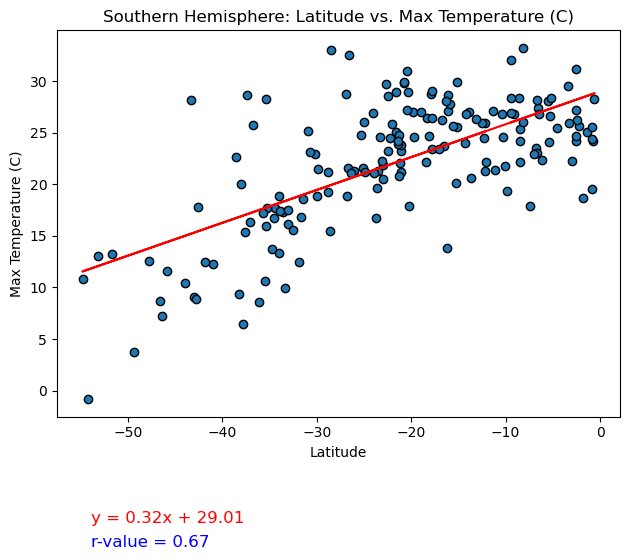

In [43]:
# Linear regression on Southern Hemisphere

x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Max Temp']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_SHvsMaxTemp'
vbl = 'Max Temperature (C)'
hemi = 'Southern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

**Discussion about the linear relationship:** When comparing correlation values (r-values), we see a stronger relationship between maximum temperature and latitude in the Northern Hemisphere, where the r-value is -0.86, than in the Southern Hemisphere, where the r-value is 0.67. The negative slope of the regression line in the Northern Hemisphere suggests a negative linear relationship between latitude and maximum temperature. In contrast, a positive relationship is observed in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

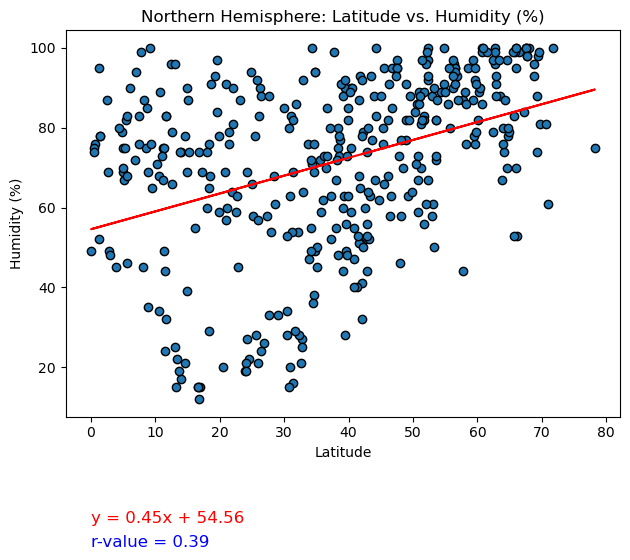

In [44]:
# Northern Hemisphere

x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Humidity']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_NHvsHumidity'
vbl = 'Humidity (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

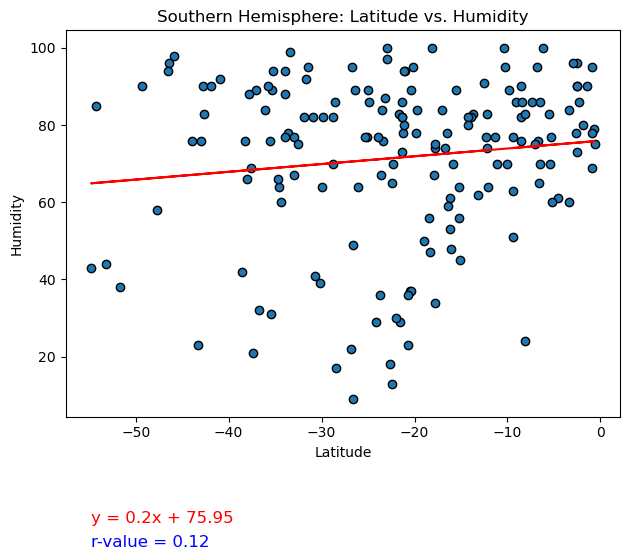

In [45]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_SHvsHumidity'
vbl = 'Humidity'
hemi = 'Southern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show() 

**Discussion about the linear relationship:** There is a weak positive linear relationship between Latitude and humidity for both the northern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

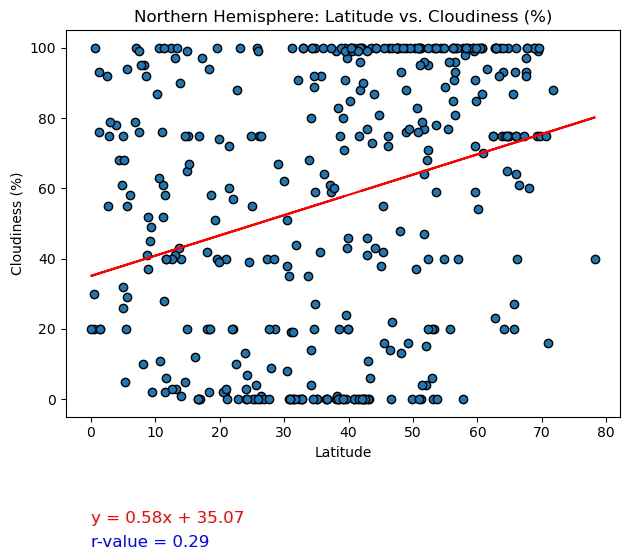

In [46]:
# Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Cloudiness']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_NHvsCloud'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

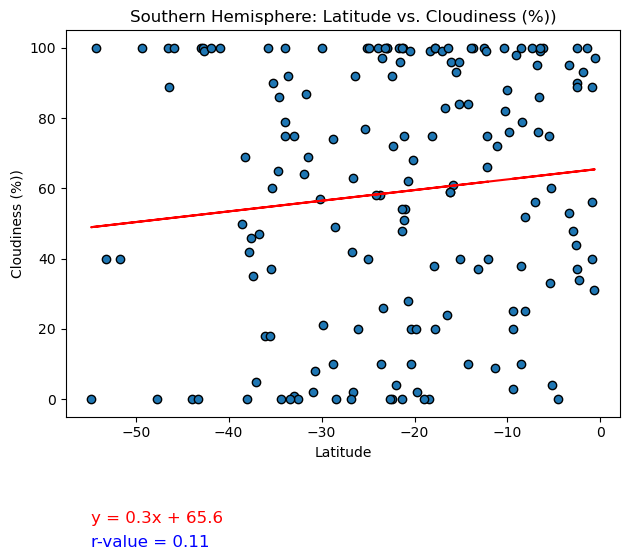

In [47]:
# Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Cloudiness']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_SHvsCloud'
vbl = 'Cloudiness (%))'
hemi = 'Southern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

**Discussion about the linear relationship:** There is a weak positive linear relationship between Latitude and cloudiness for both the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

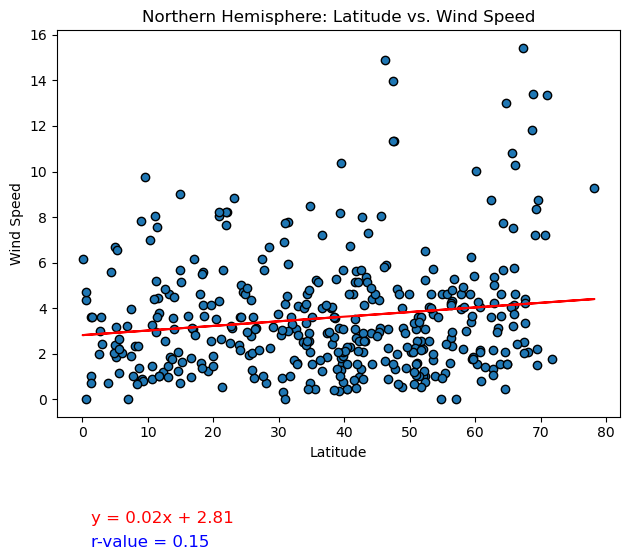

In [48]:
# Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Wind Speed']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_NHvsWind'
vbl = 'Wind Speed'
hemi = 'Northern Hemisphere'
lr_funcV2(x_val, y_val, name, vbl, hemi)
plt.show()

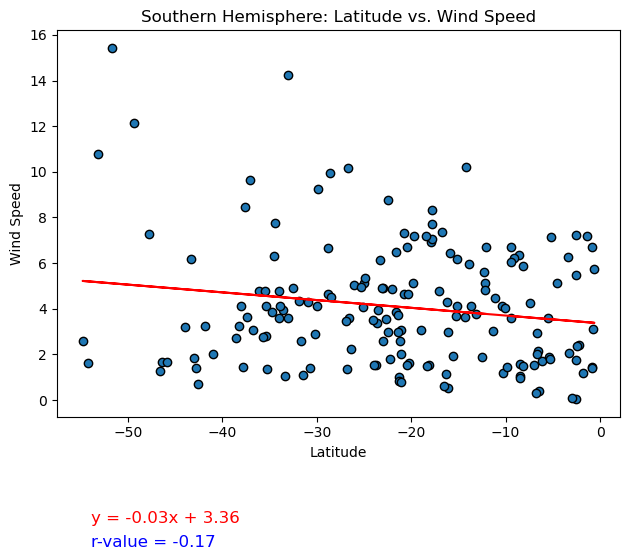

In [49]:
# Southern Hemisphere
x_val = southern_hemi_df['Lat']
y_val = southern_hemi_df['Wind Speed']
plt.scatter(x_val, y_val, edgecolors='black')
name = 'Lat_SHvsWind'
vbl = 'Wind Speed'
hemi = 'Southern Hemisphere'
lr_funcV2(x_val, y_val,name, vbl, hemi)
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and latitude for both the northern and southern hemispheres. 